In [ ]:
##Imports

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
##Reading Data
data = pd.read_csv('data.csv')
data.head(6)

In [ ]:
data.drop(["Var_1","Segmentation","ID"],axis=1,inplace=True)

In [12]:
data.set_index=False
data.drop(columns=data.columns[0],inplace=True)

In [13]:
data

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,No,32,Yes,Healthcare,9.0,Low,3.0
1,No,56,Yes,Artist,0.0,Low,1.0
2,Yes,75,No,Lawyer,1.0,Low,1.0
3,Yes,39,No,Entertainment,9.0,Low,2.0
4,No,22,No,Healthcare,9.0,Low,5.0
...,...,...,...,...,...,...,...
10690,No,30,Yes,Healthcare,8.0,Low,1.0
10691,Yes,81,Yes,Lawyer,0.0,Average,2.0
10692,No,40,Yes,Entertainment,14.0,Low,1.0
10693,Yes,87,Yes,Lawyer,1.0,High,2.0


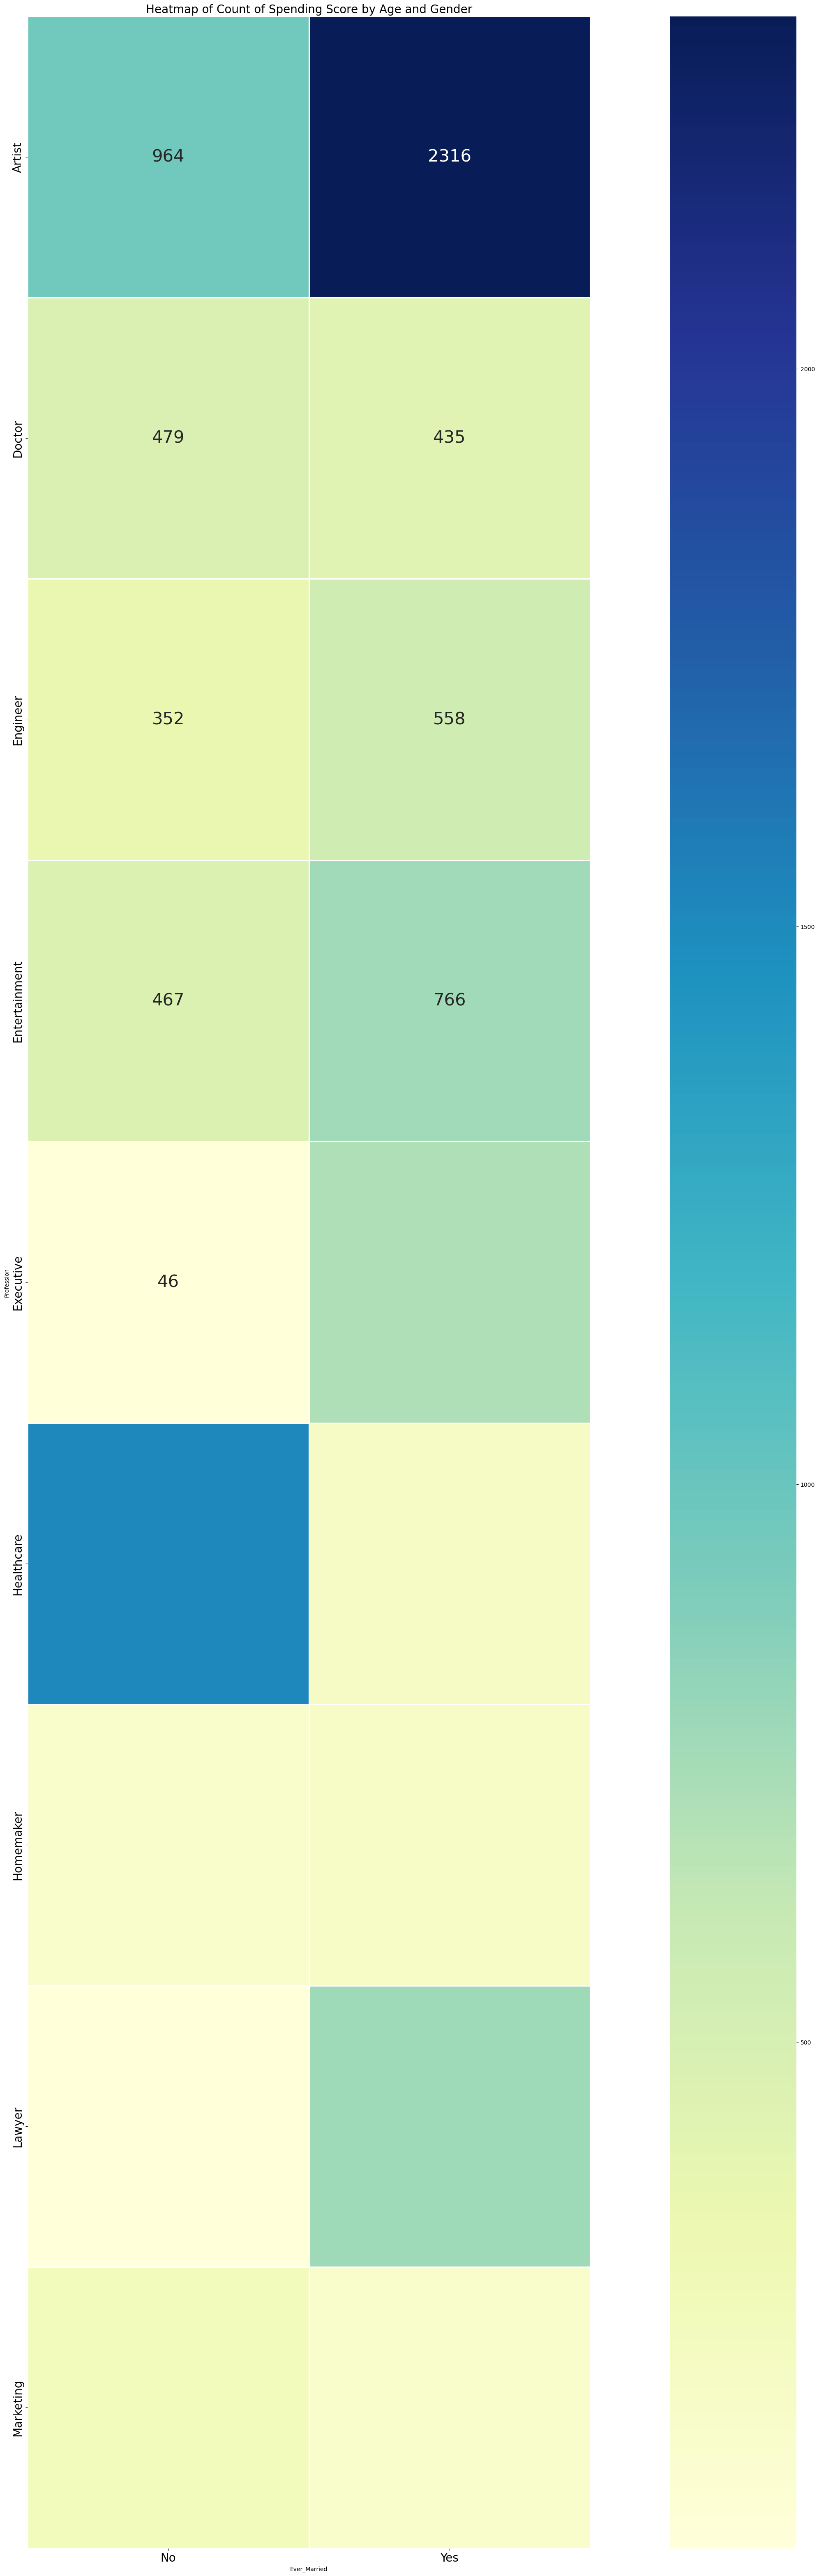

In [21]:
# Calculate the count of 'Spending Score' for each combination of 'Gender' and 'Age'
count_spending = data.groupby(['Ever_Married', 'Profession'])['Spending_Score'].count().reset_index()

# Create the pivot table
pivot_table = count_spending.pivot(index='Profession', columns=['Ever_Married'], values='Spending_Score')

# Fill NaN values with 0
pivot_table = pivot_table.fillna(0)

# Create the heatmap
plt.figure(figsize=(50,80)) # Set the figure size
sns.heatmap(pivot_table, annot=True, fmt="d", linewidths=2, square=True, cbar_kws={"orientation": "vertical"}, cmap='YlGnBu',annot_kws={"fontsize": 30})
plt.tick_params(axis='both', labelsize=20)
plt.title('Heatmap of Count of Spending Score by Age and Gender',fontsize=20)
plt.show()


In [ ]:
dataL = data[data['Age']<75]
# Calculate the count of 'Spending Score' for each combination of 'Gender' and 'Age'
count_spending = dataL.groupby(['', 'Age'])['Spending_Score'].count().reset_index()

# Create the pivot table
pivot_table = count_spending.pivot(index='Age', columns=['Gender'], values='Spending_Score')

# Fill NaN values with 0
pivot_table = pivot_table.fillna(0)

# Create the heatmap
plt.figure(figsize=(50,80)) # Set the figure size
sns.heatmap(pivot_table, annot=True, fmt="d", linewidths=.5, square=True, cbar_kws={"orientation": "vertical"}, cmap='YlGnBu')
plt.title('Heatmap of Count of Spending Score by Age and Gender')
plt.show()


## Gender 


In [ ]:
male = data.loc[data['Gender']=='Male'].count()[0]
female = data.loc[data['Gender']=='Female'].count()[0]

In [ ]:
male

In [ ]:
plt.pie([male,female],autopct='%.2f%%',labels=['male','female'])

plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.bar(["Male","Female"],[male,female])
plt.show()

In [ ]:
profession_counts = data['Profession'].value_counts()
plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%')
plt.title('Profession Distribution')
plt.show()

## Age


In [ ]:
age = data['Age']
young = data.loc[age<19].count()[0]
youngadults = data.loc[(age>18) & (age<30)].count()[0]
adults = data.loc[(age>30) & (age<45)].count()[0]
middleaged = data.loc[(age>45) & (age<65)].count()[0]
senior = data.loc[age>65].count()[0]
ages = [young,adults,youngadults,middleaged,senior]
ages

In [ ]:
label = ['young','adults','youngadults','middleaged','senior']
explodes=[0.2,0,0,0,0.3]
plt.pie(ages,autopct='%.2f%%',labels=label,explode=explodes)
plt.show()

In [ ]:
plt.bar(label,ages)
plt.show()

In [ ]:
plt.boxplot(data["Age"])
plt.show()

## Graduation

In [ ]:
grads = data.loc[data['Graduated']=='Yes'].count()[0]
notgrad = data.loc[data['Graduated']=='No'].count()[0]
grad = [grads,notgrad]
label = ['grads','notgrad']

plt.pie(grad,autopct='%.2f%%',labels=label)
plt.show()

In [ ]:
plt.bar(label,grad)

## Spending Score

In [ ]:
data['Spending_Score']

In [ ]:
low = data.loc[data['Spending_Score']=='Low'].count()[0]
high = data.loc[data['Spending_Score']=='High'].count()[0]
average = data.loc[data['Spending_Score']=='Average'].count()[0]

spending = [low,average,high]
label = ['low','average','high']

plt.pie(spending,autopct='%.2f%%',labels=label)
plt.show()

In [ ]:
plt.bar(label,spending)

In [ ]:
marriage_counts = data['Ever_Married'].value_counts()
plt.pie(marriage_counts, labels=marriage_counts.index, autopct='%1.1f%%')
plt.title('Marriage Distribution')
plt.show()

In [ ]:
marriage_counts = data['Ever_Married'].value_counts()
plt.bar(marriage_counts.index,marriage_counts.values)
plt.title('Marriage Distribution')
plt.show()

## Family Size

In [ ]:
data['Family_Size'].unique()

In [ ]:
individual = data.loc[data['Family_Size']=='1'].count()[0]
small = data.loc[(data['Family_Size']>1) & (data['Family_Size']<4)].count()[0]
average = data.loc[(data['Family_Size']>=4) & (data['Family_Size']<7)].count()[0]
large = data.loc[data['Family_Size']>=7].count()[0]

familySizes = [individual,small,average,large]
labels = ["Individual","Small","Average","Large"]
plt.pie(familySizes,labels=labels)


In [ ]:
plt.bar(labels,familySizes)

In [ ]:
plt.hist(data['Family_Size'])

## Scatter plot

In [ ]:
plt.scatter(y=data["Age"],x=data["Spending_Score"])

## Profession

In [ ]:
profession_counts = data["Profession"].value_counts()
profession_counts.plot(kind="bar")

## Heatmap

In [ ]:
mapping = {"No": 0, "Yes": 1}
data["Ever_Married"] = data["Ever_Married"].map(mapping)
data["Graduated"] = data["Graduated"].map(mapping)

mapping = {"Female": 0, "Male": 1}
data["Gender"] = data["Gender"].map(mapping)

profession_mapping = {
    "Healthcare": 0,
    "Artist": 1,
    "Lawyer": 2,
    "Entertainment": 3,
    "Engineer": 4,
    "Executive": 5,
    "Doctor": 6,
    "Homemaker": 7,
    "Marketing": 8,
    "nan": 9
}
data['Profession'] = data['Profession'].map(profession_mapping)

score_mapping = {
    'Low': 0,
    'Average': 1,
    'High': 2
}

data['Spending_Score'] = data['Spending_Score'].map(score_mapping)




In [ ]:
data

In [ ]:
import seaborn as sns
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
original = pd.read_csv("data.csv")
original["Spending_Score"].unique()

In [ ]:
plt.scatter(x=data["Age"],y=data["Profession"])
plt.yticks([i for i in range(9)], ['Healthcare', 'Artist', 'Lawyer', 'Entertainment', 'Engineer', 'Executive', 'Doctor', 'Homemaker', 'Marketing'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data[['Age','Spending_Score','Work_Experience','Family_Size']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
data["Spending_Score"].plot(kind="box")
plt.yticks([i for i in range(3)], ['Low', 'Average', 'High'])

In [ ]:
data["Work_Experience"].plot(kind="box")

In [ ]:
data["Family_Size"].plot(kind="box")

In [ ]:
data["Profession"].plot(kind="box")
plt.yticks([i for i in range(9)], ['Healthcare', 'Artist', 'Lawyer', 'Entertainment', 'Engineer', 'Executive', 'Doctor', 'Homemaker', 'Marketing'])

In [ ]:
data["Graduated"].plot(kind="box")
plt.yticks([i for i in range(2)], ['Not Graduated', 'Graduated'])

In [ ]:
data["Graduated"].plot(kind="hist")
plt.xticks([i for i in range(2)], ['Not Graduated', 'Graduated'])


In [ ]:
plt.figure(figsize=(50,80)) 
mean_spending = data.groupby(['Age', 'Profession'])['Spending_Score'].mean().reset_index()
pivot_table = mean_spending.pivot(index='Age', columns='Profession', values='Spending_Score')
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square=True, cbar_kws={"orientation": "vertical"}, cmap='YlGnBu')
plt.title('Heatmap of Mean Spending Score by Age and Profession')
plt.xticks([i for i in range(9)], ['Healthcare', 'Artist', 'Lawyer', 'Entertainment', 'Engineer', 'Executive', 'Doctor', 'Homemaker', 'Marketing'])
plt.show()

In [ ]:
mean_spending = data.groupby(['Gender', 'Age'])['Spending_Score'].mean().reset_index()
pivot_table = mean_spending.pivot(index='Age', columns='Gender', values='Spending_Score')
plt.figure(figsize=(10,8)) # Set the figure size
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square=True, cbar_kws={"orientation": "vertical"}, cmap='YlGnBu')
plt.title('Heatmap of Mean Spending Score by Age and Gender')
plt.show()
